# KNN

Método de aprendizaje supervisado basado en el reconocimiento de patrones, es generalmente utilizado en la clasificación de objetos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataframe = pd.read_csv("/content/drive/MyDrive/IA/Investigacion /EMG/emg_features_optimized.csv")

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472001 entries, 0 to 472000
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Activity    472001 non-null  float64
 1   Mobility    472001 non-null  float64
 2   Complexity  472001 non-null  float64
 3   Cluster     472001 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 14.4 MB


In [6]:
dataframe['Cluster'].unique()

array([0, 1])

In [7]:
y = dataframe['Cluster']

In [8]:
x = dataframe.drop('Cluster', axis=1)

In [9]:
from sklearn.model_selection import train_test_split

Random State es un número que se usa para que los resultados de procesos aleatorios (como dividir datos o entrenar modelos) sean siempre los mismos cada vez que ejecutas el código. Esto ayuda a reproducir los mismos resultados.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state=45)

In [11]:
y_test

,Cluster
309945,1
230127,0
203551,1
302216,1
19646,1
...,...
69106,1
123549,1
27266,1
26803,0


In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [15]:
 predicciones = knn.predict(x_test)

In [16]:
predicciones

array([1, 0, 1, ..., 1, 0, 1])

In [17]:
x_test

,Activity,Mobility,Complexity
309945,0.002354,0.146606,0.022049
230127,0.000001,0.385498,0.324219
203551,0.068604,0.160767,0.007713
302216,0.001439,0.174316,0.022797
19646,0.021133,0.053619,0.049774
...,...,...,...
69106,0.098694,0.198120,0.019440
123549,0.700195,0.049103,0.010361
27266,0.249145,0.155884,0.011002
26803,0.000001,0.501953,0.316650


In [18]:
y_test

,Cluster
309945,1
230127,0
203551,1
302216,1
19646,1
...,...
69106,1
123549,1
27266,1
26803,0


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

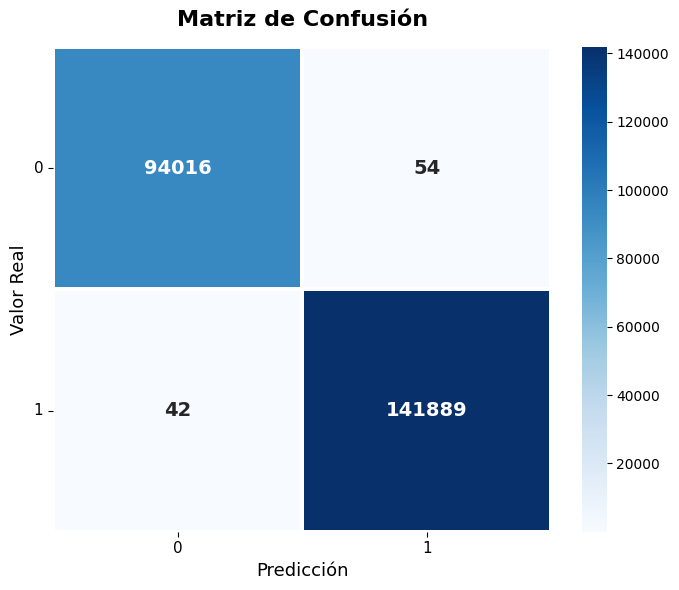

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Calcular matriz de confusión ---
cm = confusion_matrix(y_test, predicciones)
labels = np.unique(y_test)  # etiquetas de clases detectadas

# --- Gráfica ---
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels,
            annot_kws={"size": 14, "weight": "bold"}, cbar=True, linewidths=1.5)

# --- Estilo ---
plt.title('Matriz de Confusión', fontsize=16, pad=15, weight='bold')
plt.xlabel('Predicción', fontsize=13)
plt.ylabel('Valor Real', fontsize=13)

# Ajustes estéticos
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

# Mostrar
plt.show()

In [21]:
print(classification_report(y_test,predicciones, digits=4))

              precision    recall  f1-score   support

           0     0.9996    0.9994    0.9995     94070
           1     0.9996    0.9997    0.9997    141931

    accuracy                         0.9996    236001
   macro avg     0.9996    0.9996    0.9996    236001
weighted avg     0.9996    0.9996    0.9996    236001



In [22]:
tasa_error = []
for i in range (1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  prediccion_i= knn.predict(x_test)
  tasa_error.append(np.mean(prediccion_i != y_test))

In [23]:
tasa_error

[np.float64(0.00033050707412256725),
 np.float64(0.00041525247774373836),
 np.float64(0.0003940661268384456),
 np.float64(0.0004194897479247969),
 np.float64(0.00040677793738162126),
 np.float64(0.0004406760988300897),
 np.float64(0.00041525247774373836),
 np.float64(0.0004237270181058555),
 np.float64(0.0004237270181058555),
 np.float64(0.00045338790937326536),
 np.float64(0.000466099719916441),
 np.float64(0.0004491506391922068),
 np.float64(0.00044491336901114826),
 np.float64(0.00045338790937326536),
 np.float64(0.00046186244973538246),
 np.float64(0.0004576251795543239),
 np.float64(0.00045338790937326536),
 np.float64(0.000466099719916441),
 np.float64(0.00046186244973538246),
 np.float64(0.0005084724217270266),
 np.float64(0.0004999978813649095),
 np.float64(0.0004788115304596167),
 np.float64(0.00046186244973538246),
 np.float64(0.000495760611183851),
 np.float64(0.000495760611183851),
 np.float64(0.0005254215024512608),
 np.float64(0.0004915233410027924),
 np.float64(0.0005127

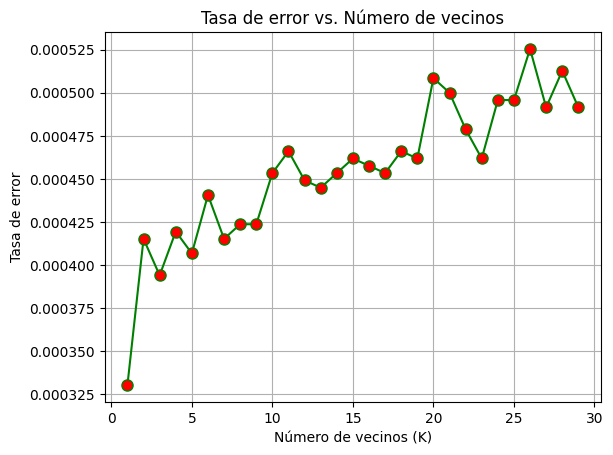

In [24]:
valores = range(1, len(tasa_error) + 1)
plt.plot(valores,tasa_error, color='green', marker = 'o', markerfacecolor ='red', markersize=8)
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Tasa de error')
plt.title('Tasa de error vs. Número de vecinos')
plt.grid(True)

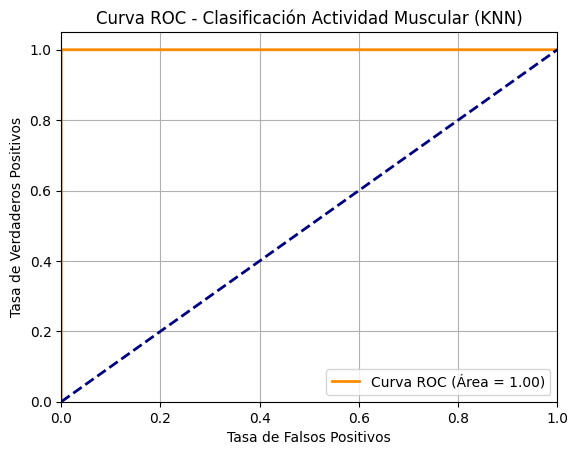

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asumiendo que 'Estado' es tu variable objetivo y ya es 0 o 1
# Y que `x_test` contiene tus variables: Media, Varianza, Desviación, etc.
# y `y_test` contiene la columna Estado

# Obtener las probabilidades de la clase 1 (actividad muscular)
knn_probs = knn.predict_proba(x_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Curva ROC (Área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Clasificación Actividad Muscular (KNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [29]:
import joblib

model_filename = 'knn_model.pkl'

# Save the model to the specified path in Google Drive
joblib.dump(knn, model_filename)

print(f"Model saved successfully to {model_filename}")



Model saved successfully to knn_model.pkl


In [27]:
import time
import sys
import psutil
import os
import pickle
import numpy as np

# --- CONFIGURACIÓN ---
N_ITER = 1000  # Número de iteraciones para estimar tiempo promedio

# --- TIEMPO DE INFERENCIA (PROMEDIO Y DESVIACIÓN ESTÁNDAR) ---
tiempos = []
for _ in range(N_ITER):
    start_time = time.perf_counter()
    _ = knn.predict(x_test)
    end_time = time.perf_counter()
    tiempos.append(end_time - start_time)

inference_mean = np.mean(tiempos)
inference_std = np.std(tiempos)
print(f"Inference time: {inference_mean:.6f} ± {inference_std:.6f} seconds "
      f"(based on {N_ITER} iterations)")

# --- CONSUMO DE MEMORIA DEL MODELO (MB) ---
model_memory_bytes = sys.getsizeof(knn)
model_memory_mb = model_memory_bytes / (1024 ** 2)
print(f"Model memory (approx.): {model_memory_mb:.6f} MB")

# --- USO DE RAM DEL PROCESO (MB) ---
process = psutil.Process(os.getpid())
ram_usage_bytes = process.memory_info().rss
ram_usage_mb = ram_usage_bytes / (1024 ** 2)
print(f"RAM usage: {ram_usage_mb:.6f} MB")

# --- USO DE ESPACIO EN DISCO (MB) ---
model_filename = 'knn_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(knn, f)
disk_usage_bytes = os.path.getsize(model_filename)
disk_usage_mb = disk_usage_bytes / (1024 ** 2)
os.remove(model_filename)
print(f"Model disk space (exported): {disk_usage_mb:.6f} MB")

KeyboardInterrupt: 